# T012 · Data acquisition from KLIFS

Authors:

- Jaime Rodríguez-Guerra, 2019-2020, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2019-2020, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

KLIFS is a database for kinase-ligand interaction fingerprints and structures. We will use the programmatic access of this database to query for kinase-ligand structures for a query kinase from within this Jupyter Notebook.

### Contents in *Theory*

- KLIFS

### Contents in *Practical*

- Write the functions that will compose the pipeline
- Case study: EGFR inhibitors

### References

* Kinase-centric computational drug development ([_Annu. Rep. Med. Chem._ (2017), __50__, 197-236](https://www.sciencedirect.com/science/article/pii/S0065774317300040?via%3Dihub))
* KLIFS, a kinase-inhibitor interactions database.
   * Main database/website reference ([_Nucleic Acids Res._ (2020)](https://academic.oup.com/nar/advance-article/doi/10.1093/nar/gkaa895/5934416))
   * Introduction of the KLIFS website & database ([_Nucleic Acids Res._ (2016), __44__, 6, D365–D371](https://doi.org/10.1093/nar/gkv1082))
   * Initial KLIFS dataset, binding mode classification, residue numbering ([_J. Med. Chem._ (2014), __57__, 2, 249-277](https://pubs.acs.org/doi/abs/10.1021/jm400378w))
* NGLView, the interactive molecule visualizer ([_Bioinformatics_ (2018), __34__, 1241–124](https://doi.org/10.1093/bioinformatics/btx789))

## Theory

### Kinases

Kinases are one the most important and well-studied drug targets, since they are critical to most aspects of cell life and their dysregulation causes many diseases such as cancer, inflammation, and autoimmune disorders. 
Since this protein class is so well-studied, the amount of available data is growing more and more, allowing and requiring infrastructures that organize, analyze, and provide this data to facilitate kinase-centric drug development ([_Annu. Rep. Med. Chem._ (2017), __50__, 197-236](https://www.sciencedirect.com/science/article/pii/S0065774317300040?via%3Dihub)). One of these rich resources is the KLIFS database, which will be used in this talktorial.

### KLIFS

The __K__inase-__L__igand __I__nteraction __F__ingerprints and __S__tructures database (KLIFS) is a database that provides information about the protein structure (collected from the PDB) of catalytic kinase domains and the interaction with their ligands. 

* Role: Kinase-ligand interaction profiles database
* Website: http://klifs.net/
* API: Yes, REST-based, Swagger-enabled. No official client. Use `bravado`.
* Documentation: http://klifs.net/swagger/
* Literature:
   * Main database/website reference ([_Nucleic Acids Res._ (2020)](https://academic.oup.com/nar/advance-article/doi/10.1093/nar/gkaa895/5934416))
   * Introduction of the KLIFS website & database ([_Nucleic Acids Res._ (2016), __44__, 6, D365–D371](https://doi.org/10.1093/nar/gkv1082))
   * Initial KLIFS dataset, binding mode classification, residue numbering ([_J. Med. Chem._ (2014), __57__, 2, 249-277](https://pubs.acs.org/doi/abs/10.1021/jm400378w))
    

> Kinase-Ligand Interaction Fingerprints and Structures database (KLIFS), developed at the Division of Medicinal Chemistry - VU University Amsterdam, is a database that revolves around the protein structure of catalytic kinase domains and the way kinase inhibitors can interact with them. Based on the underlying systematic and consistent protocol all (currently human and mouse) kinase structures and the binding mode of kinase ligands can be directly compared to each other. Moreover, because of the classification of an all-encompassing binding site of 85 residues it is possible to compare the interaction patterns of kinase-inhibitors to each other to, for example, identify crucial interactions determining kinase-inhibitor selectivity.

### KLIFS Swagger API

The KLIFS database offers standardized URL schemes (__REST API__) to programmatically access - from your computer - resources that live on the KLIFS server. You could literally paste such an URL into your browser (sending a __request__) and you would get back a result (receiving a __response__).

Now, it would be possible to generate these URL schemes with your own little script or library (__client__), but it would _really_ be nicer if you would not need to deal with the technical details of how to set up such an URL. 
Luckily, there is a solution - some websites provide you with a document that defines these REST API schema for you (__Swagger definitions__). 
Luckily again, KLIFS is one of them! 

- Take a look at how such a document looks like in case of KLIFS (it's a json file): https://klifs.net/swagger/swagger.json 
- You can also explore the definitions interactively using Swaggers user interface (Swagger UI): http://klifs.net/swagger/

We are getting closer. We know now that we can get KLIFS results using URLs and we know thanks to the KLIFS Swagger definitions how these URLs need to look like. 
What we are still missing is a nice Python program (client) that offers a simple API to send these requests and receive the responses - under the hood - for us.

We are lucky once more. Libraries like `bravado` can be used to generate dynamically such a Python client based on Swagger definitions - for our webservice at hand here, `bravado` can be used to generate a KLIFS client based on the KLIFS Swagger definitions. This KLIFS client will offer many different methods to interact with the KLIFS webservice (as defined by the Swagger definitions). In the "Practical" section of this talktorial, we will revisit these steps!

### OpenCADD

TBA

## Practical

We can obtain curated protein structures from this database for a query kinase to extract ligand information for that kinase. 
This set of ligands could be used to retrieve similar ligands from other databases, like PubChem (__Talktorial T013__) or ChEMBL (__Talktorial T001+T004__).

TODO: We will first show how to access the KLIFS database (a) using the KLIFS Swagger API and (b) using `opencadd`'s unofficial KLIFS client.

### Generate a KLIFS Python client

First, we will generate a KLIFS Python client using the provided KLIFS Swagger definitions.

In [2]:
from bravado.client import SwaggerClient

In [3]:
KLIFS_API_DEFINITIONS = "https://klifs.net/swagger/swagger.json"
KLIFS_CLIENT = SwaggerClient.from_url(KLIFS_API_DEFINITIONS, config={"validate_responses": False})

As with any Python library, you can access the KLIFS client's entry points when hitting the Tab key after 

```python
KLIFS_CLIENT.
```

Available entry points are: 

- `KLIFS_CLIENT.Information`: Access to kinases (name, group, family, ...).
- `KLIFS_CLIENT.Interactions`: Access to kinase-ligand interaction fingerprints.
- `KLIFS_CLIENT.Ligands`: Access to kinase-bound ligands (name, SMILES, ...) and their measured bioactivity against kinases (ChEMBL data).
- `KLIFS_CLIENT.Structures`: Access to kinase structures with and without ligands (including their KLIFS-processed PDB data).

### Obtaining information from KLIFS

Choose a random kinase from a random family (in `mol2`) and the corresponding ligands (`SMILES`) from the KLIFS database. We will also obtain the PDB structure of the protein-ligand complex so we can calculate the binding pockets in part B.

In [2]:
def _all_kinase_families():
    return KLIFS_CLIENT.Information.get_kinase_families().response().result


def _kinases_from_family(family, species="HUMAN"):
    return (
        KLIFS_CLIENT.Information.get_kinase_names(kinase_family=family, species=species)
        .response()
        .result
    )


def _protein_and_ligand_structure(*kinase_ids):
    structures = (
        KLIFS_CLIENT.Structures.get_structures_list(kinase_ID=kinase_ids).response().result
    )
    molcomplex = (
        KLIFS_CLIENT.Structures.get_structure_get_pdb_complex(
            structure_ID=structures[0].structure_ID
        )
        .response()
        .result
    )
    protein = (
        KLIFS_CLIENT.Structures.get_structure_get_protein(structure_ID=structures[0].structure_ID)
        .response()
        .result
    )
    ligands = KLIFS_CLIENT.Ligands.get_ligands_list(kinase_ID=kinase_ids).response().result
    print(
        f"Chosen KLIFS entry with PDB ID {structures[0].pdb} with chain {structures[0].chain} and alternate model {structures[0].alt}"
    )
    return molcomplex, protein, [ligand.SMILES for ligand in ligands]

In [3]:
import random
import time


def random_kinase_structure():
    """
    Get a random kinase from a random family
    """
    attempts = 20
    families = _all_kinase_families()
    while attempts:  # some kinase IDs do not have a structure available
        family = random.choice(families)
        kinase = random.choice(_kinases_from_family(family))
        try:
            molcomplex, protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
        else:
            print(
                "Chosen",
                kinase.name,
                "kinase with ID",
                kinase.kinase_ID,
                "from family",
                family,
            )
            return molcomplex, protein, ligands
    print("Could not find a valid kinase. Try again!")
    return None, None, None


def kinase_structure_from_family(family):
    """
    Given a kinase family name (check `_all_kinase_families()`), retrieve a random structure.
    """
    attempts = 20
    while attempts:  # some kinase IDs cannot be found in the structure list...
        kinase = random.choice(_kinases_from_family(family))
        try:
            molcomplex, protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
        else:
            print(
                "Chosen",
                kinase.name,
                "kinase with ID",
                kinase.kinase_ID,
                "from family",
                family,
            )
            return molcomplex, protein, ligands
    print("Could not find a valid kinase. Try again!")
    return None, None, None

Let's check if this works. Let's say you want a random kinase from a random family, you can use `random_kinase_structure()` like this:

In [4]:
molcomplex, protein, ligands = random_kinase_structure()

Chosen KLIFS entry with PDB ID 4x7q with chain A and alternate model 
Chosen PIM2 kinase with ID 161 from family PIM


In [5]:
ligands

['S1C(=NC(C(=O)Nc2c(O[C@@H]3CNCC3)ccnc2)=C1)c4c(F)cccc4F',
 '[OH]#C[Ru]12345([C]6=C1C2=C3C4=6)N1CCC[C@@H]2[C@@H]3[C@H]([C@H]4[C@H]6[C@@H](N5[C@@H]4[C@@H]12)CCCC6)C(=O)NC3=O']

Let's preview the protein with `nglview` and the ligands with `rdkit`. Run the cell below first if you have not installed `nglview` yet.

In [6]:
import nglview as nv
from tempfile import NamedTemporaryFile
from rdkit import Chem
from rdkit.Chem.Draw import (
    IPythonConsole,
    MolsToGridImage,
)  # Needed to show molecules


def preview_molecule_contents(contents, ext="mol2"):
    # This is a temporary file, it will be autodeleted
    v = nv.NGLWidget()
    v.add_component(contents, ext=ext)
    return v


def preview_smiles(smiles):
    print(smiles)
    return Chem.MolFromSmiles(smiles)

In [7]:
v = preview_molecule_contents(protein)
v

NGLWidget()

In [8]:
v.render_image();

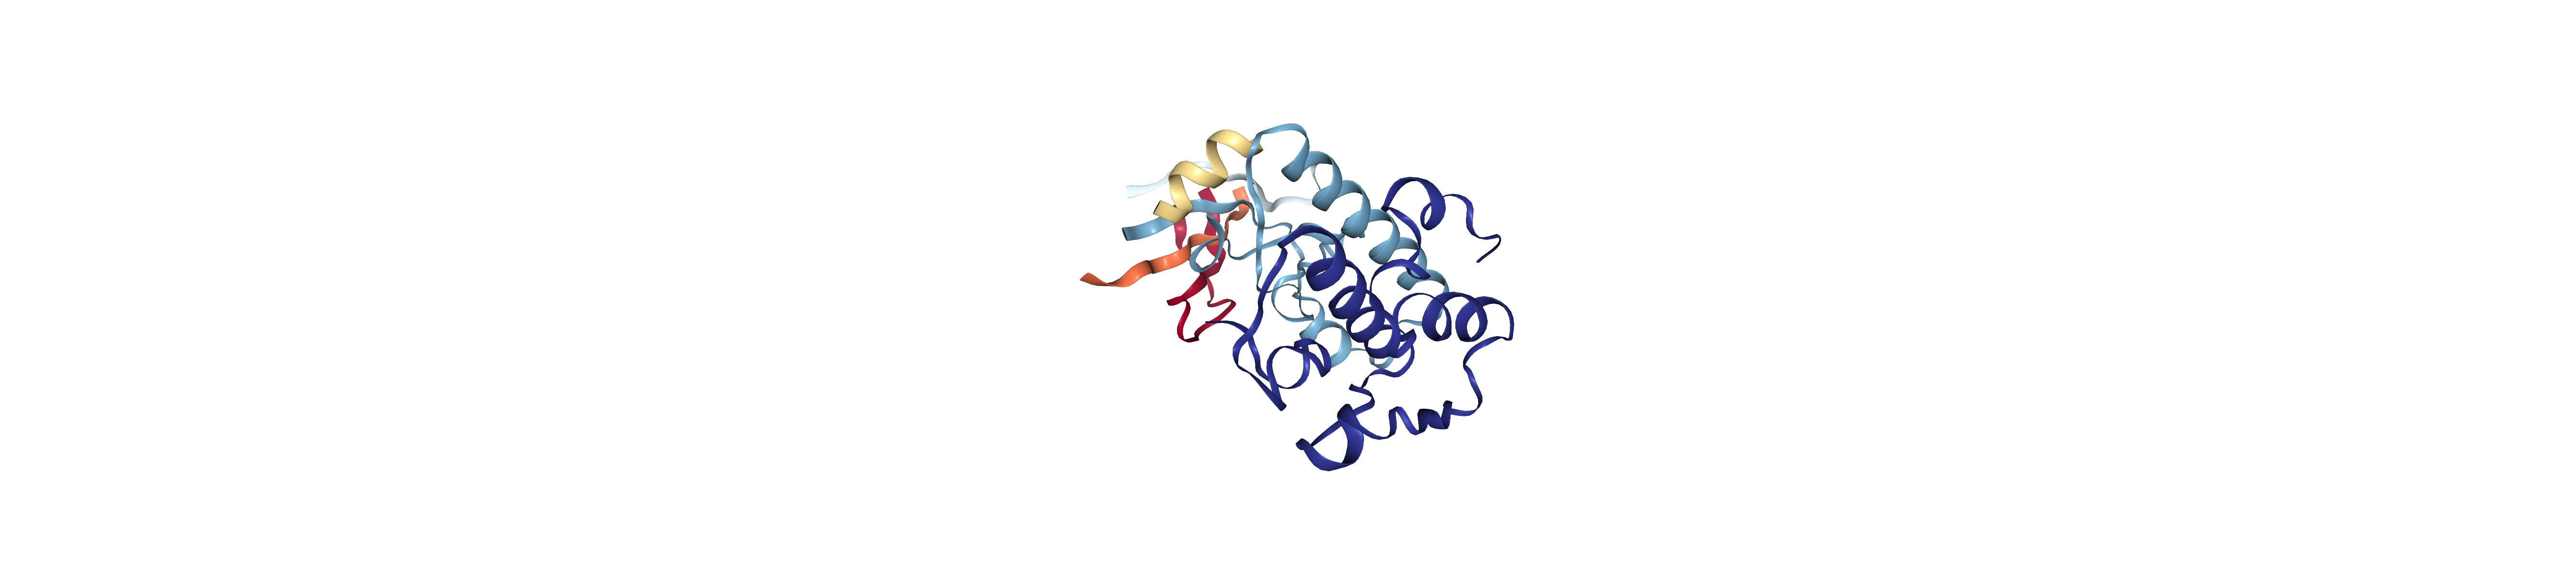

In [10]:
v._display_image()

S1C(=NC(C(=O)Nc2c(O[C@@H]3CNCC3)ccnc2)=C1)c4c(F)cccc4F


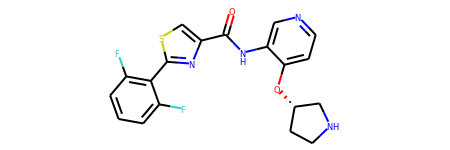

In [11]:
preview_smiles(ligands[0])

### Case study: EGFR

Adapted from [the corresponding Wikipedia article](https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor):

>The epidermal growth factor receptor (EGFR) is a member of the ErbB family of receptors, a subfamily of four closely related receptor tyrosine kinases: EGFR (ErbB-1), HER2/neu (ErbB-2), Her 3 (ErbB-3) and Her 4 (ErbB-4). In many cancer types, mutations affecting EGFR expression or activity could result in cancer.
>
>Deficient signaling of the EGFR and other receptor tyrosine kinases in humans is associated with diseases such as Alzheimer's, while over-expression is associated with the development of a wide variety of tumors. Interruption of EGFR signalling, either by blocking EGFR binding sites on the extracellular domain of the receptor or by inhibiting intracellular tyrosine kinase activity, can prevent the growth of EGFR-expressing tumours and improve the patient's condition.


As a result, we are interested in finding potential inhibitors that can target members of the EGFR family. Let's repeat the same steps as above, but now targeting this specific family.

In [12]:
egfr_molcomplex, egfr_protein, egfr_ligands = kinase_structure_from_family("EGFR")

Chosen KLIFS entry with PDB ID 4riw with chain A and alternate model 
Chosen ERBB3 kinase with ID 408 from family EGFR


Preview protein:

In [13]:
v = preview_molecule_contents(egfr_protein)
v

NGLWidget()

In [14]:
v.render_image();

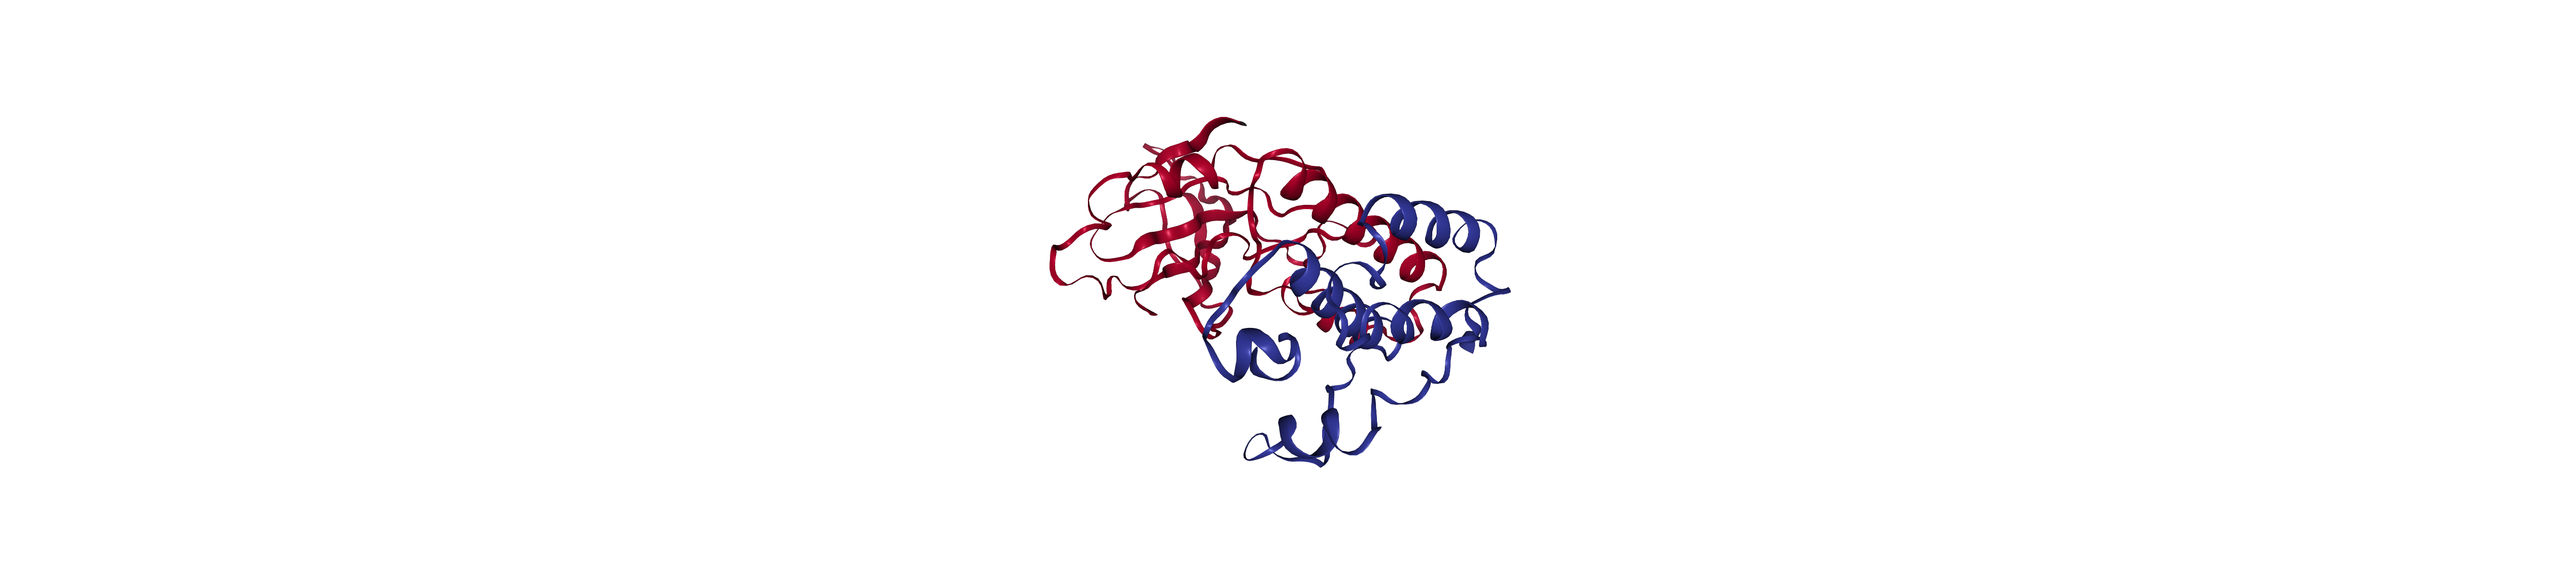

In [15]:
v._display_image()

Preview EGFR ligand (ATP):

P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](O)[C@@H]1O)O


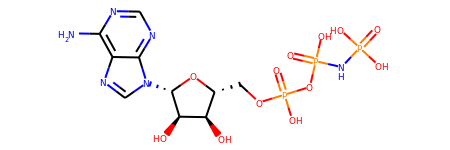

In [16]:
preview_smiles(egfr_ligands[0])

## Discussion

**TODO** Remove PubChem references.

In this notebook you have learned how to access and use different web services depending on the technologies available, from well documented API to handcrafted scrapers that try to mimic an actual web browser.

So far, we have queried the KLIFS database for members of the EGFR family, obtaining a kinase structure plus (unsurprisingly) its native ligand, the ATP. Then, PubChem has provided similar compounds with more than a 75% of similarity. We will choose one of those to perform structural modeling in the next parts.

## Quiz

- How many kinases does KLIFS provide for the "EGFR" family?
- **TODO**
- **TODO**